In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ABCDeqs import lens_matrix, space_matrix,q_param,propagate_q,waist_from_q



%matplotlib inline

In [2]:
lensfmin15 = lens_matrix(-15)
lensfmin20 = lens_matrix(-20)
lensfmin25 = lens_matrix(-25)
lensfmin30 = lens_matrix(-30)
lensfplus40 = lens_matrix(40)
lensfplus50 = lens_matrix(50)
lensv = 

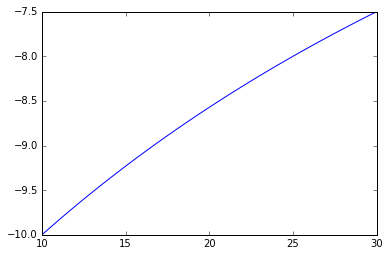

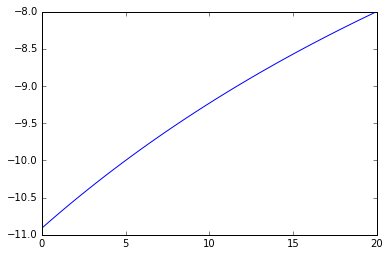

In [3]:
f1 = -20
f2 = -30

a = np.linspace(10,30)
Feff = (f1*f2)/(f1+f2-a)
plt.plot(a,Feff)
plt.show()

f1 = -15
f2 = -40

a = np.linspace(0,20)
Feff = (f1*f2)/(f1+f2-a)
plt.plot(a,Feff)
plt.show()

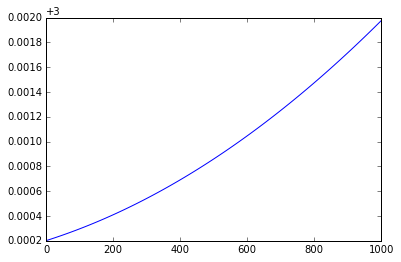

In [4]:

spacer1 = space_matrix(22,1)
spacer2 = space_matrix(32.5,1)
pos_after = np.linspace(0,1000,100)
space_after = [space_matrix(x,1) for x in pos_after]
syst_matr = [space_af*lensfplus50*spacer2*lensfmin30*spacer1*lensfmin20 for space_af in space_after]

starting_waist = 3 #mm
lam = 671e-6
qstart = q_param(lam,starting_waist,np.inf)
q_end = [propagate_q(qstart,sys) for sys in syst_matr]
waist_end = [waist_from_q(q,lam) for q in q_end]
plt.plot(pos_after,waist_end)
plt.show()

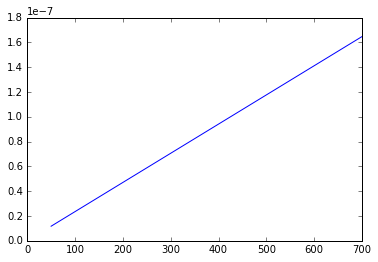

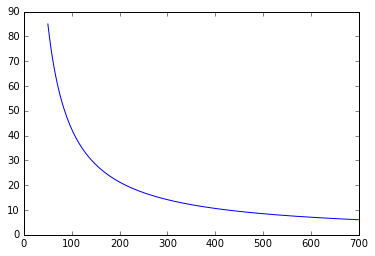

In [11]:
beamdiamMicrons = np.linspace(50,700,200)
acoustvel = 4250 #m/s
commuttime = (beamdiamMicrons*1e-6)/acoustvel
responsefreq = 1/commuttime
plt.plot(beamdiamMicrons,commuttime)
plt.show()
plt.plot(beamdiamMicrons,responsefreq*1e-6)
plt.show()